In [215]:
options(repr.plot.width=4, repr.plot.height=4)
library(rethinking)

# Q1
- The weights listed below were recorded in the !Kung census, but heights
were not recorded for these individuals.
- Provide predicted heights and 89%
compatibility intervals for each of these individuals.
- That is, fill in the table
below, using model-based predictions.

In [216]:
# Individual | weight | expected height | 89% interval<p>
#      1     | 45
#      2     | 40
#      3     | 65
#      4     | 31
#      5     | 53

In [217]:
data(Howell1)
d <- Howell1

In [218]:
str(d)

'data.frame':	544 obs. of  4 variables:
 $ height: num  152 140 137 157 145 ...
 $ weight: num  47.8 36.5 31.9 53 41.3 ...
 $ age   : num  63 63 65 41 51 35 32 27 19 54 ...
 $ male  : int  1 0 0 1 0 1 0 1 0 1 ...


In [219]:
# Standardize data
std.d <- data.frame(scale(d))

sd(d$age)
mean(d$age)

[1] 20.74689

[1] 29.34439

In [220]:
attributes(scale(d))

$dim
[1] 544   4

$dimnames
$dimnames[[1]]
NULL

$dimnames[[2]]
[1] "height" "weight" "age"    "male"  


$`scaled:center`
     height      weight         age        male 
138.2635963  35.6106176  29.3443934   0.4724265 

$`scaled:scale`
    height     weight        age       male 
27.6024476 14.7191782 20.7468882  0.4996986

In [221]:
# data is at the individual level.
flist <- alist(
    height ~ dnorm( mu, sigma ),
    mu <- a + b1*weight ,
    a ~ dnorm(0,1),
    b1 ~ dlnorm(0,1),
    sigma ~ dlnorm(0,1)
)

model <- quap(flist = flist, data =list(height=std.d$height,
                                        weight=std.d$weight) )

In [222]:
model


Quadratic approximate posterior distribution

Formula:
height ~ dnorm(mu, sigma)
mu <- a + b1 * weight
a ~ dnorm(0, 1)
b1 ~ dlnorm(0, 1)
sigma ~ dlnorm(0, 1)

Posterior means:
            a            b1         sigma 
-2.171647e-08  9.406112e-01  3.386153e-01 

Log-likelihood: -182.77 

In [223]:
d.pred <- list(
    weight = c(45,40,65,31,53)
)

z.score <- function(x) {(x - 35.6106175924632)/27.6024476405647}
z.score(d.pred$weight)

[1]  0.3401648  0.1590215  1.0647383 -0.1670365  0.6299942

In [224]:
# Uncertainty around parameter.
height.posterior <- link(fit = model,data=list(weight=z.score(d.pred$weight)))
# Uncertainty around sampling,prediction
sim.height <- sim( model , data = list(weight=z.score(d.pred$weight)) )
# extract.samples(model) # parameters

In [225]:
apply( sim.height , 2 , mean, prob=0.89 )
apply( sim.height , 2 , PI, prob=0.89 )

[1]  0.3246246  0.1350121  0.9982839 -0.1759698  0.5866576

5%,-0.2335298,-0.4155610,0.4507006,-0.7234296,0.008523315
94%,0.8912987,0.6801119,1.5429597,0.3890454,1.164312639


In [226]:
apply( height.posterior , 2 , mean, prob=0.89 )
apply( height.posterior , 2 , PI,  prob=0.89 )

[1]  0.3198464  0.1494285  1.0015179 -0.1573237  0.5925150

5%,0.2952878,0.1256604,0.9687199,-0.1809009,0.5648515
94%,0.3445864,0.1731387,1.0347438,-0.1327089,0.6199354


In [227]:
# Unstandardized height
rev.z.score <- function(x) {(138.263596323529)+x*(20.746888222142)}

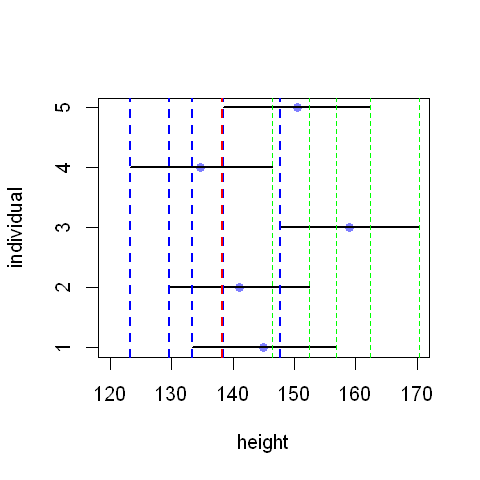

In [228]:
plot( individual ~ height , list(
    height = rev.z.score(apply( sim.height , 2 , mean, prob=0.89 )),
    individual = c(1,2,3,4,5)
) , col=col.alpha(rangi2,1), xlim=c(120,170),
     pch = 16 )
for ( i in 1:5 )
    lines(x=c(rev.z.score(apply( sim.height , 2 , PI,  prob=0.89 )[i+(i-1)]),
              rev.z.score(apply( sim.height , 2 , PI,  prob=0.89 )[i+i])),
          y=c(i,i), lwd = 2 )
# needed multiple for loops because didnt work otherwise.
for ( i in 1:5 )
    abline(v=rev.z.score(apply( sim.height , 2 , PI,  prob=0.89 )[i+(i-1)]),
           lty=2,
           col=c(ifelse((i+(i-1)) %% 2 ==0,'green','blue'),col.alpha(rangi2,0.5)),
           lwd=2)
for ( i in 1:5 )
    abline(v=rev.z.score(apply( sim.height , 2 , PI,  prob=0.89 )[i+i]),
           lty=2,
           col=ifelse((i+(i-1)) %% 2 ==0,'blue','green'),
           lwd=0)
abline(v = mean(d$height), col='red', lty=2, lwd=2)

In [229]:
mean(d$height)

[1] 138.2636

# Q2
- Model the relationship between height (cm) and the natural logarithm of
weight (log-kg):<p> log(weight).
- Use the entire Howell1 data frame, all 544 rows, adults and non-adults. 
- Use any model type from Chapter 4 that you think useful:
- an ordinary linear regression, a polynomial or a spline. 
- Plot the posterior predictions against the raw data.

In [230]:
d$log_weight <- log(d$weight)

In [231]:
# Standardize data
std.d2 <- data.frame(scale(d))

sd(d$age)
mean(d$age)

[1] 20.74689

[1] 29.34439

In [232]:
# data is at the individual level.
flist <- alist(
    height ~ dnorm( mu, sigma ),
    mu <- a + b1*weight ,
    a ~ dnorm(0,1),
    b1 ~ dlnorm(0,1),
    sigma ~ dlnorm(0,1)
)

model1 <- quap(flist = flist, data =list(height=std.d2$height,
                                         weight=std.d2$log_weight) )

In [233]:
model1


Quadratic approximate posterior distribution

Formula:
height ~ dnorm(mu, sigma)
mu <- a + b1 * weight
a ~ dnorm(0, 1)
b1 ~ dlnorm(0, 1)
sigma ~ dlnorm(0, 1)

Posterior means:
            a            b1         sigma 
-9.756892e-09  9.824490e-01  1.861445e-01 

Log-likelihood: 143.04 

In [234]:
attributes(scale(d))

$dim
[1] 544   5

$dimnames
$dimnames[[1]]
NULL

$dimnames[[2]]
[1] "height"     "weight"     "age"        "male"       "log_weight"


$`scaled:center`
     height      weight         age        male  log_weight 
138.2635963  35.6106176  29.3443934   0.4724265   3.4423298 

$`scaled:scale`
    height     weight        age       male log_weight 
27.6024476 14.7191782 20.7468882  0.4996986  0.5759596

In [235]:
z_score_log <- function(x) {(x - 3.44232984801386)/0.575959647001175}

In [236]:
z_score_log(log(d.pred$weight))

[1]  0.63256626  0.42806750  1.27102207 -0.01448477  0.91666503

In [237]:
inv_z_score_log <- function(x) {138.263596323529 + (x*27.6024476405647)}

In [238]:
# Uncertainty around parameter.
height.posterior <- link(fit = model1,data=list(weight=z_score_log(log(d.pred$weight))))
# Uncertainty around sampling,prediction
sim.height <- sim( model1 , data = list(weight=z_score_log(log(d.pred$weight))) )

In [239]:
inv_z_score_log(apply(sim.height, 2, PI, .89))

5%,147.0769,141.2254,164.6967,129.5964,154.7323
94%,163.1871,157.7961,180.3532,145.7442,171.4217


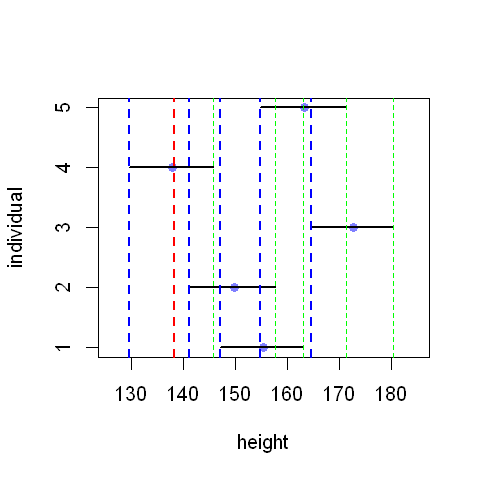

In [240]:
plot( individual ~ height , list(
    height = inv_z_score_log(apply( sim.height , 2 , mean, prob=0.89 )),
    individual = c(1,2,3,4,5)
) , col=col.alpha(rangi2,1), xlim=c(126,185),
     pch = 16 )
for ( i in 1:5 )
    lines(x=c(inv_z_score_log(apply( sim.height , 2 , PI,  prob=0.89 )[i+(i-1)]),
              inv_z_score_log(apply( sim.height , 2 , PI,  prob=0.89 )[i+i])),
          y=c(i,i), lwd = 2 )
# needed multiple for loops because didnt work otherwise.
for ( i in 1:5 )
    abline(v=inv_z_score_log(apply( sim.height , 2 , PI,  prob=0.89 )[i+(i-1)]),
           lty=2,
           col=c(ifelse((i+(i-1)) %% 2 ==0,'green','blue'),col.alpha(rangi2,0.5)),
           lwd=2)
for ( i in 1:5 )
    abline(v=inv_z_score_log(apply( sim.height , 2 , PI,  prob=0.89 )[i+i]),
           lty=2,
           col=ifelse((i+(i-1)) %% 2 ==0,'blue','green'),
           lwd=0)
abline(v = mean(d$height), col='red', lty=2, lwd=2)

In [276]:
seq.w <- seq(3, 64, 1)

sim.height_vs_data <- sim( model1 ,
                          data = list(weight=z_score_log(log(seq.w))))

mu.height <- link(model1 , data = list(weight=z_score_log(log(seq.w))))

mu <- inv_z_score_log(apply( mu.height , 2 , mean ))

mu.PI <- inv_z_score_log(apply( mu.height , 2 , PI, prob=0.89 ))

height.PI <- inv_z_score_log(apply( sim.height_vs_data , 2 , PI, prob=0.89 ))

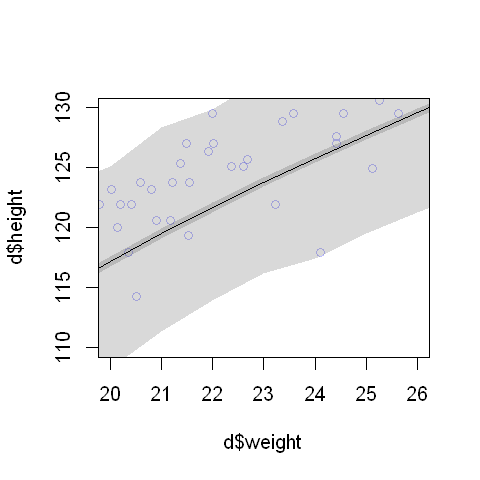

In [285]:
plot(d$height~d$weight,
     col=col.alpha(rangi2,0.5),
     xlim=range(20,26),
     ylim=range(110,130)
    )
lines(seq.w, mu )
shade(mu.PI, seq.w )
shade(height.PI, seq.w )

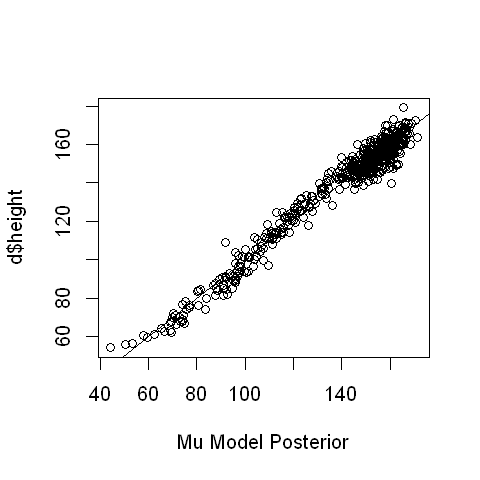

In [297]:
plot(d$height~inv_z_score_log(apply(link(model1) , 2 , mean )),
     xlab = 'Mu Model Posterior'
    )
abline(a = 0, b = 1 )

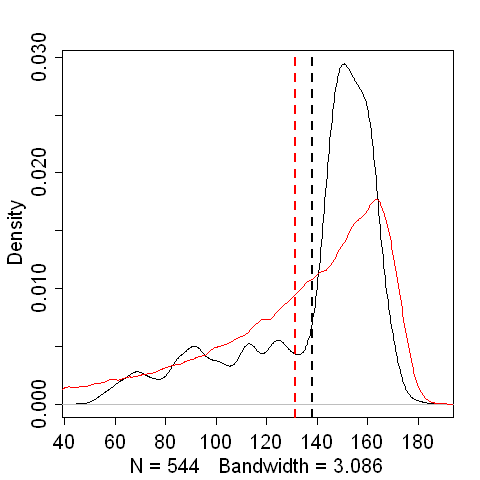

In [324]:
dens(d$height, col='black')
dens(inv_z_score_log(sim.height_vs_data), ylim=range(0,0.03), col='red', add = TRUE)
abline(v = mean(inv_z_score_log(sim.height_vs_data)), col='red', lty=2, lwd=2)
abline(v = mean(d$height), col='black', lty=2, lwd=2)

# Q3
- Plot the prior predictive distribution for the polynomial regression model in Chapter 4.  
Section 4.5.1 (pg.111)
- You can modify the code that plots the linear regression prior predictive distribution. 
- 20 or 30 parabolas from the prior should suffice to show where the prior probability resides.
- Can you modify the prior distributions of α, β1, and β2 so that the prior
predictions stay within the biologically reasonable outcome space?
- That is to say: Do not try to fit the data by hand.
- But do try to keep the curves consistent with what you know about height and weight,
before seeing these exact data.


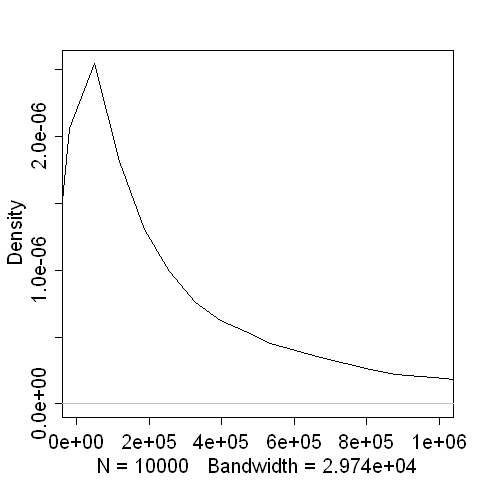

In [395]:
# h ~ Norm(mu, sig)
# mu <- alpha + beta1*x1 + beta2*x1^2
# alpha ~ Norm(178,20)
# beta1 ~ Log-Norm(0,1)
# beta2 ~ Log-Norm(0,1)
# sig ~ Unif(0,50)

# curve(dnorm(x , 178 , 20 ) , from=100 , to=250)
# curve(dunif(x,min = 2, max = 50), from=0 , to=60)
# curve(dlnorm(x,meanlog = 0, sdlog = 1), from=0 , to=2)

sig <- runif(n = 10000, min = 0, max = 10)
beta2 <- rlnorm(n = 10000, meanlog = 0, sdlog = 1)
beta1 <- rlnorm(n = 10000, meanlog = 0, sdlog = 1)
alpha <- rnorm(n = 10000, mean = 178, sd = 1)
x1 <- seq(to = 0, from = 1000, length.out = 10000)
mu <- alpha + beta1*x1 + beta2*x1^2
h <- rnorm(n = 10000, mean = mu , sd = sig)
#dens(h, xlim=range(0,1000000))
dens(mu, xlim=range(0,1000000))

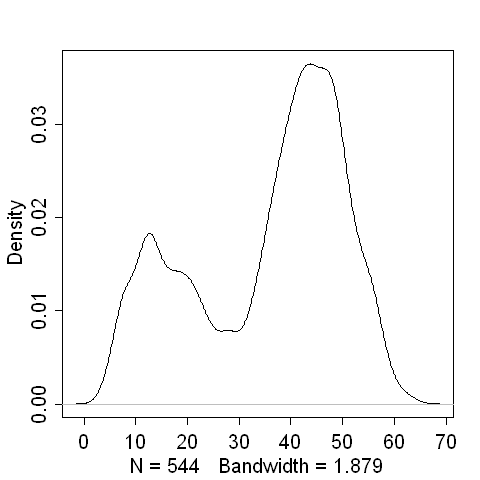

In [370]:
dens(d$weight)

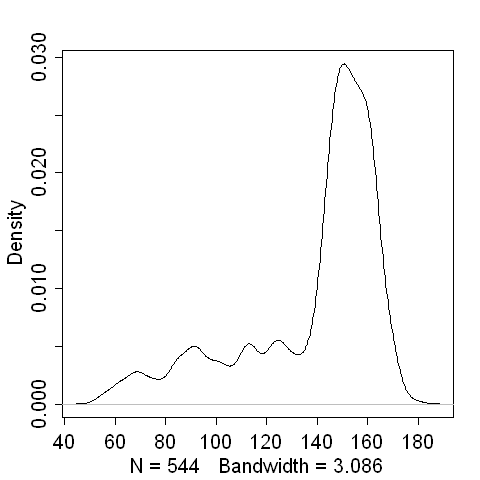

In [371]:
dens(d$height)

In [387]:
mean(mu)

[1] 516648